# Support Vector Classifier Implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Lets create synthetic data points

In [3]:
from sklearn.datasets import  make_classification

In [21]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0, random_state=4)

In [22]:
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y

<Axes: xlabel='feature1', ylabel='feature2'>

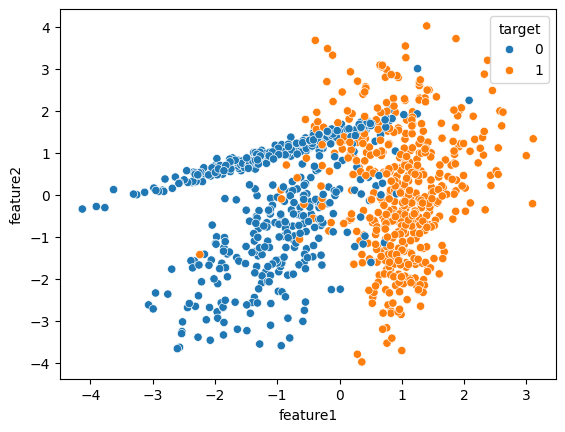

In [23]:
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df)

In [24]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [26]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
svc.score(X_test, y_test)

0.915

In [28]:
from sklearn.metrics import  classification_report, confusion_matrix
print(classification_report(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        98
           1       0.91      0.92      0.92       102

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200

[[89  9]
 [ 8 94]]


In [29]:
rbf_svc=SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
print(classification_report(y_test, rbf_svc.predict(X_test)))
print(confusion_matrix(y_test, rbf_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        98
           1       0.95      0.92      0.94       102

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

[[93  5]
 [ 8 94]]


In [30]:
poly_svc=SVC(kernel='poly')
poly_svc.fit(X_train, y_train)
print(classification_report(y_test, poly_svc.predict(X_test)))
print(confusion_matrix(y_test, poly_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        98
           1       0.94      0.81      0.87       102

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200

[[93  5]
 [19 83]]


In [31]:
sigmoid_svc=SVC(kernel='sigmoid')
sigmoid_svc.fit(X_train, y_train)
print(classification_report(y_test, sigmoid_svc.predict(X_test)))
print(confusion_matrix(y_test, sigmoid_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        98
           1       0.86      0.82      0.84       102

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

[[84 14]
 [18 84]]


In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : [0.1, 1, 10, 100],
    'gamma' : [1, 0.1, 0.01, 0.001],
    'kernel' : ['rbf']
}

grid = GridSearchCV(SVC(), param_grid=param_grid,refit=True, cv=5,verbose=3)

In [37]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.919 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [38]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [39]:
print(classification_report(y_test, grid.predict(X_test)))
print(confusion_matrix(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        98
           1       0.95      0.90      0.92       102

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200

[[93  5]
 [10 92]]
